In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("../../../output/current_values(x_walk).csv", index_col=0)


hf = pd.read_csv("../../../output/Codes/2digit_occupations.csv", index_col=0)
hf = hf.set_index("codes")



In [10]:
min(df["Year"])

1975

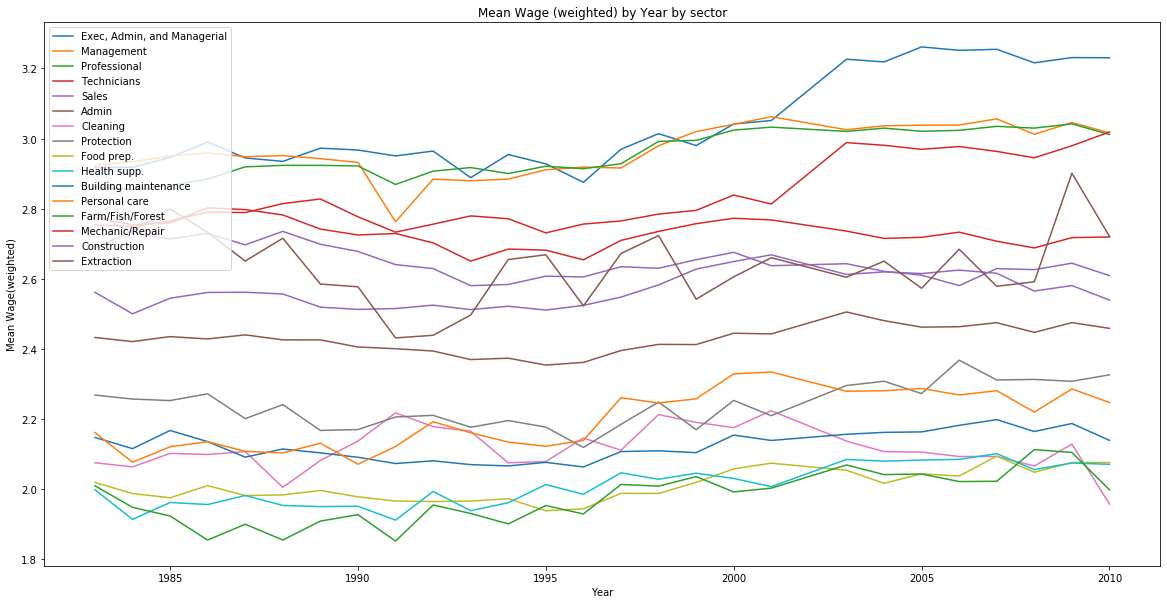

In [44]:
#One way of finding Mean wage (weighted) - ONE LINE
#import numpy One way of finding Mean wage (weighted)

grouped = df.groupby(['2digit occupation', "Year"])

arrays = []
for x in hf.index.values.tolist()[:-3]:
    for y in df.sort_values(by="Year")["Year"].unique():
        try:
            arrays.append(grouped.get_group((x, y))[["Year", "2digit occupation", "Asecwt", "Wage"]].to_numpy())
        except KeyError: pass
plt.figure(figsize=[20,10])
digit = 1.0
years = []
averages = []
for array in arrays:
    values = np.log(array[:,-1])
    weights = array[:,2]
    year = array[0,0]
    two = array[0,1]
    average = np.average(values, weights=weights)
    if digit != two:
        plt.plot(years,averages, label=hf.loc[digit]["occupation"])
        digit = two
        years = []
        averages = []
    years.append(year)
    averages.append(average)
plt.plot(years,averages, label=hf.loc[digit]["occupation"])
plt.legend(loc=2)
plt.xlabel("Year")
plt.ylabel("Mean Wage(weighted)")
plt.title("Mean Wage (weighted) by Year by sector")
plt.savefig('../../../output/Graphs/Everyone/Mean Wage by Year by sector.png')

1975
2000


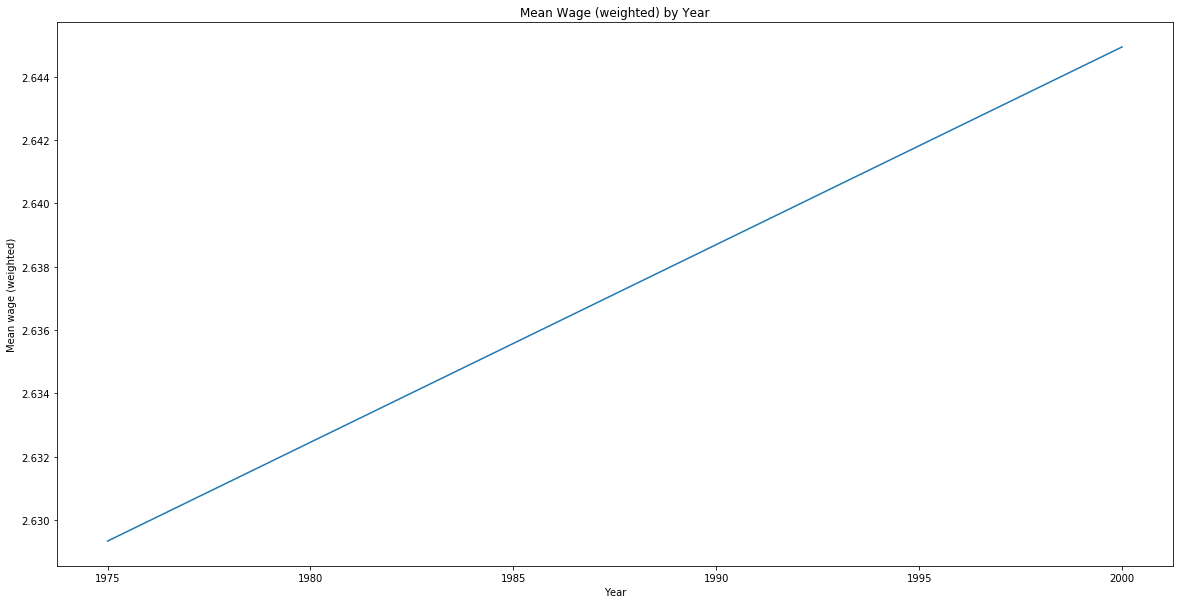

In [11]:
#https://stackoverflow.com/questions/2413522/weighted-standard-deviation-in-numpy
import numpy as np

grouped = df.groupby(["Year"])
arrays = []

for x in df.sort_values(by="Year")["Year"].unique():
    if x in [1975,2000]:
        print(x)
        arrays.append(grouped.get_group((x))[["Year", "Asecwt", "Wage"]].to_numpy())

plt.figure(figsize=[20,10])
digit = 3.0
years = []
averages = []
for array in arrays:
    values = np.log(array[:,-1])
    weights = array[:,1]
    year = array[0,0]
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    years.append(year)
    averages.append(average)
plt.plot(years,averages)
plt.xlabel("Year")
plt.ylabel("Mean wage (weighted)")
plt.title("Mean Wage (weighted) by Year")
plt.savefig("../../../output/Graphs/Everyone/Mean Wage by Year.png")

In [ ]:
#NEW WAY OF CALCULATING MEAN WAGE

In [ ]:
import numpy as np
#make a table with asecwt sums in groups of 2digit occ and year
grouped = df.groupby(['2digit occupation',"Year"]).agg({"Asecwt":"sum"}).reset_index()
#renamed column with sum in the table
grouped = grouped.rename(columns={"Asecwt":"Asecwt_sum"})
#merged table with frame that had the asecwt sum grouped by year and 2digit occ
grouped = pd.merge(df, grouped, on=["Year", "2digit occupation"], how='left')
#created a new column in merged dataframe for each row that created the weighted wage
grouped["Wage"] = grouped["Wage"] *grouped["Asecwt"] / grouped["Asecwt_sum"]
#grouped by 2digit and year, and founded the sum
grouped = grouped.groupby(["2digit occupation","Year"])["Wage"].sum().reset_index()

digit = 1
years = []
wages = []
plt.figure(figsize=[16,8])
#Went through a dataframe grouped by 2 digit occupation, then each year in occupation with weighted wage variance
for x in range(len(grouped)):
    #occupation
    two = grouped.iloc[x][0]
    #year
    year = grouped.iloc[x][1]
    #Wage variance (weighted)
    wage = grouped.iloc[x][2]
    if digit != two:
        #when there is a new occupation, put the line into plot
        plt.plot(years,wages, label=hf.loc[digit]["occupation"])
        digit = two
        years = []
        wages = []
    years.append(year)
    wages.append(wage)
plt.plot(years,wages, label=hf.loc[digit]["occupation"])
plt.xlabel("Year")
plt.ylabel("mean wage (weighted)")
plt.title("mean wage (weighted) for Field by year")
plt.legend(loc=2)
plt.savefig('../output/Graphs/mean wage (weighted) by sector.png')

In [ ]:
import numpy as np
#make a table with asecwt sums in groups of 2digit occ and year
grouped = df.groupby(["Year"]).agg({"Asecwt":"sum"}).reset_index()
#renamed column with sum in the table
grouped = grouped.rename(columns={"Asecwt":"Asecwt_sum"})
#merged table with frame that had the asecwt sum grouped by year and 2digit occ
grouped = pd.merge(df, grouped, on=["Year"], how='left')
#created a new column in merged dataframe for each row that created the weighted wage
grouped["Wage"] = grouped["Wage"] *grouped["Asecwt"] / grouped["Asecwt_sum"]
#grouped by 2digit and year, and founded the sum
grouped = grouped.groupby(["Year"])["Wage"].sum().reset_index()
years = []
wages = []
for x in range(len(grouped)):
    year = grouped.iloc[x][0]
    wage = grouped.iloc[x][1]
    years.append(year)
    wages.append(wage)
plt.plot(years, wages)
plt.xlabel("Year")
plt.ylabel("Average Wage")
plt.title("Average Weighted Wage by Year")
plt.savefig('../output/Graphs/mean wage (weighted).png')

In [15]:
cd/Users/jsusser/Dropbox/thesis/4_CPS/Clean_HPV/output/Graphs/Everyone/

/Users/jsusser/Dropbox/thesis/4_CPS/clean_HPV/output/Graphs/Everyone
